# Dr. Semmelweis and the discovery of handwashing

In [29]:
# Setup code
%load_ext ipython_nose

The ipython_nose extension is already loaded. To reload it, use:
  %reload_ext ipython_nose


## 1. Meet Dr. Ignaz Semmelweis


<img style="float: left;margin:5px 20px 5px 1px" src="https://i.imgur.com/MOjyIXX.jpg">
<!--
<img style="float: left;margin:5px 20px 5px 1px" src="img/ignaz_semmelweis_1860.jpeg">
Comments work, right?
-->
This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. If Dr. Semmelweis looks troubled it's probably because he's thinking about *childbed fever*: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth dies from it. He is thinking about it because he knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and *wash their hands*!

In this notebook we're going to reanalyze the data that made Semmelweis discover the importance of *handwashing*. Let's start by looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital.

- Read about Dr. Ignaz Semmelweis to the right.
- Import the `pandas` module.
- Read in `datasets/yearly_deaths_by_clinic.csv` and assign it to the variable `yearly`.
- Print out `yearly`.

<hr>

### Good to know

To complete this project you need to be familiar with `pandas` DataFrames and bootstrap analysis. Here are relevant DataCamp exercises if you need to brush up your skills:

- From [Intermediate Python for Data Science](https://www.datacamp.com/courses/intermediate-python-for-data-science)
    - [Reading in a csv-file](https://campus.datacamp.com/courses/intermediate-python-for-data-science/dictionaries-pandas?ex=12)
    - [Selecting columns using `[]`](https://campus.datacamp.com/courses/intermediate-python-for-data-science/dictinaries-pandas?ex=15)
- From [`pandas` Foundations](https://www.datacamp.com/courses/pandas-foundations)
    - [Inspecting DataFrames](https://campus.datacamp.com/courses/pandas-foundations/data-ingestion-inspection?ex=2)
    - [Line plots using Pandas](https://campus.datacamp.com/courses/pandas-foundations/exploratory-data-analysis?ex=2)
    - [Dates in DataFrames](https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=2)
- From [Statistical Thinking in Python (Part 2)](https://www.datacamp.com/courses/statistical-thinking-in-python-part-2)
    - [Bootstrap analysis](https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=1)

Even if you've taken these courses you will still find this project challenging unless you use some external _documentation_. Here is a [pandas cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) summarizing the basics of pandas DataFrames. (You could also look at the [official pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html) but be aware that it is _very technical_.)

Finally, know that _Google is you friend_ and a good search pattern is **example of ??? in pandas** where **???** is whatever you need to do. For example, if you need to read in a csv file you could search for [_example of reading a csv file in pandas_](http://www.google.com/search?q=example+of+reading+a+csv+file+in+pandas).

If you import the pandas module like this:

```python
import pandas as pd
```

You can use the `pd.read_csv` method to read in data stored in `csv`-files.

To print out `yearly` insert the following as the last row of the cell:

```python
yearly
```

In [30]:
# importing modules
# -- YOUR CODE HERE --

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = ...

# Print out yearly
# -- YOUR CODE HERE --

In [57]:
# importing modules
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv("datasets/yearly_deaths_by_clinic.csv")

# Print out yearly
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [32]:
%%nose
def test_yearly_exists():
    assert "yearly" in globals(), \
        "The variable yearly should be defined."
        
def test_yearly_correctly_loaded():
    correct_yearly = pd.read_csv("datasets/yearly_deaths_by_clinic.csv")
    try:
        pd.testing.assert_frame_equal(yearly, correct_yearly)
    except AssertionError:
        assert False, "The variable yearly should contain the data in yearly_deaths_by_clinic.csv"
        

2/2 tests passed


## 2. The alarming number of deaths

The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an *alarming* number of women died as the result of child birth, most of them from childbed fever.

We see this more clearly if we look at the *proportion of deaths* out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.

- Calculate the proportion of `deaths` per number of `births` and store the result in the new column `yearly["proportion_deaths"]`.
- Extract the rows from clinic 1 into `yearly1` and the rows from clinic 2 into `yearly2`.
- Print out `yearly2`.

<hr>

Here you need to be able to "pick out" or _subset_ rows and columns in the `yearly` DataFrame. How to do that can be glanced from the [pandas cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) under the headings **Subset observations** and **Subset Variables**.

If `df` is a DataFrame with columns `a` and `b` you could create a new column `c` like this:

```python
df["c"] = df["a"] + df["c"]
```

This is how you could select the rows that only correspond to Clinic 1:

```python
yearly1 = yearly[yearly["clinic"] == "clinic 1"]
```

In [33]:
# Calculate proportion of deaths per no. births
# -- YOUR CODE HERE --

# Extract clinic 1 data into yearly1 and clinic 2 data into yearly2
yearly1 = ...
yearly2 = ...

# Print out yearly1
# -- YOUR CODE HERE --

In [72]:
# Calculate proportion of deaths per no. births
yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]

# Extract clinic 1 data into yearly1 and clinic 2 data into yearly2
yearly1 = yearly[yearly["clinic"] == "clinic 1"]
yearly2 = yearly[yearly["clinic"] == "clinic 2"]

# Print out yearly1
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [73]:
%%nose

def test_proportion_deaths_exists():
    assert 'proportion_deaths' in yearly, \
        "The DataFrame yearly should have the column proportion_deaths"

def test_proportion_deaths_is_correctly_calculated():
    assert all(yearly["proportion_deaths"] == yearly["deaths"] / yearly["births"]), \
        "The column proportion_deaths should be the number of deaths divided by the number of births."
   
def test_yearly1_correct_shape():
    assert yearly1.shape == yearly[yearly["clinic"] == "clinic 1"].shape, \
        "yearly1 should contain the rows in yearly from clinic 1"
def test_yearly2_correct_shape():
    assert yearly2.shape == yearly[yearly["clinic"] == "clinic 2"].shape, \
        "yearly2 should contain the rows in yearly from clinic 2"

4/4 tests passed


## 3. Death at the clinics

If we now plot the proportion of deaths at both clinic 1 and clinic 2  we'll see a curious pattern...

- Plot `proportion_deaths` by `year` for the two clinics in a single plot. 
    - Use the DataFrame `plot` method.
    - Label the plotted lines using the `label` argument to `plot`.
    - Save the Axes object returned by the `plot` method into the variable `ax`.
    - Change the y-axis label to `"Proportion deaths"`

<hr>

For plotting it is easiest to use the `plot` method that is built into DataFrames. To get two lines into the same plot we need to use a trick you might not have seen before. If `df1` and `df2` are two DataFrames you can plot their data together like this:

```python
ax = df1.plot(x="col_a", y="col_b",
              label="df1")
df2.plot(x="col_a", y="col_b",
         label="df2", ax=ax)
```

By capturing the `ax` object and giving it as an argument in the plot statement we get both lines in the same plot. The `ax` object can be used to further modify the plot. This is how you would add a label to the y-axis: 

```python
ax.set_ylabel("A label")
```

This is how you would plot the data in `yearly1`:

```python
ax = yearly1.plot(x="year", 
    y="proportion_deaths", 
    label="Clinic 1")
```

In [36]:
# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
# -- YOUR CODE HERE --

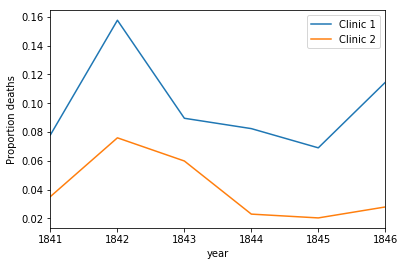

In [74]:
# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = yearly1.plot(x="year", y="proportion_deaths", label="Clinic 1")
yearly2.plot(x="year", y="proportion_deaths", label="Clinic 2", ax=ax)
ax.set_ylabel("Proportion deaths")

In [75]:
%%nose

def test_ax_exists():
    assert 'ax' in globals(), \
        "The result of the plot method should be assigned to a variable called ax"
        
def test_plot_plots_correct_data():
    y0 = ax.get_lines()[0].get_ydata()
    y1 = ax.get_lines()[1].get_ydata()
    assert (
        (all(yearly1["proportion_deaths"] == y0) and
         all(yearly2["proportion_deaths"] == y1))
        or
        (all(yearly1["proportion_deaths"] == y1) and
         all(yearly2["proportion_deaths"] == y0))), \
        "The data from clinic 1 and clinic 2 should be plotted as two separate lines."

2/2 tests passed


## 4. The handwashing begins

Why is the proportion of deaths constantly so much higher in Clinic 1? Semmelweis saw the same pattern, and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwifes only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses. 

Semmelweis started to suspect that something on the corpses, spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates he decreed: *Wash your hands!* This was an unorthodox and controversial request, nobody in Vienna new about bacteria at this point in time. 

Let's load in monthly data from clinic 1 to see if the handwashing had any effect.

- Read in `datasets/monthly_deaths.csv` and assign it to the variable `monthly`. 
    - Make sure to tell `read_csv` to parse the `date` column as a date.
- Calculate the proportion of `deaths` per number of `births` and store the result in the new column `monthly["proportion_deaths"]`.
- Print out the first rows in `monthly` using the `head()` method.

<hr>

The `read_csv` method doesn't automatically detect which columns contain dates. You can tell `read_csv` this by giving a list of the date columns as the optional argument `parse_dates`. For example, if `datasets/my_data.csv` is a csv-file with a date column `date` then you can read it in like this:

```python
my_df = pd.read_csv("datasets/my_data.csv", parse_dates=["date"])
```


You can calculate `monthly["proportion_deaths"]` almost in the same way as in Task 2. 

In [39]:
# Read datasets/monthly_deaths.csv into monthly
monthly = ...

# Calculate proportion of deaths per no. births
# -- YOUR CODE HERE --

# Print out the first rows in monthly
# -- YOUR CODE HERE --

In [40]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv("datasets/monthly_deaths.csv", parse_dates=["date"])

# Calculate proportion of deaths per no. births
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]

# Print out the first rows in monthly
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In [41]:
%%nose

def test_monthly_exists():
    assert "monthly" in globals(), \
        "The variable monthly should be defined."
        
def test_monthly_correctly_loaded():
    correct_monthly = pd.read_csv("datasets/monthly_deaths.csv")
    try:
        pd.testing.assert_series_equal(monthly["births"], correct_monthly["births"])
    except AssertionError:
        assert False, "The variable monthly should contain the data in monthly_deaths.csv"

def test_date_correctly_converted():
    assert monthly.date.dtype == pd.to_datetime(pd.Series("1847-06-01")).dtype, \
        "The column date should be converted using the pd.to_datetime() function"        
        
def test_proportion_deaths_is_correctly_calculated():
    assert all(monthly["proportion_deaths"] == monthly["deaths"] / monthly["births"]), \
        "The column proportion_deaths should be the number of deaths divided by the number of births."

4/4 tests passed


## 5. The effect of handwashing

With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!

- Plot `proportion_deaths` by `date` for the `monthly` date using the DataFrame `plot` method.
    - Save the Axes object returned by the `plot` method into the variable `ax`.
- Change the y-axis label to `"Proportion deaths"`

<hr>



The code to make the plot is almost the same as for task 3.

In [42]:
# Plot monthly proportion of deaths
# -- YOUR CODE HERE --

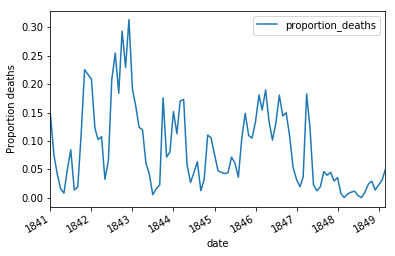

In [76]:
ax = monthly.plot(x="date", y="proportion_deaths")
ax.set_ylabel("Proportion deaths")

In [44]:
%%nose
        
def test_ax_exists():
    assert 'ax' in globals(), \
        "The result of the plot method should be assigned to a variable called ax"

def test_plot_plots_correct_data():
    y0 = ax.get_lines()[0].get_ydata()
    assert all(monthly["proportion_deaths"] == y0), \
        "The plot should show the column 'proportion_deaths' in monthly."

2/2 tests passed


## 6. The effect of handwashing highlighted

Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory. 

The effect of handwashing is made even more clear if we highlight this in the graph.

- Split `monthly` into
    - `before_washing` : the rows in `monthly` before `handwashing_start`.
    - `after_washing` : the rows in `monthly` at and after `handwashing_start`.
- Plot `proportion_deaths` in `before_washing` and `after_washing` into the same plot.
    - Use the DataFrame `plot` method.
    - Label the plotted lines using the `label` argument to `plot`.
    - Save the Axes object returned by the `plot` method into the variable `ax`.
    - Change the y-axis label to `"Proportion deaths"`

<hr>

Since the column `monthly["date"]` was read in as a date column we can now compare it to other dates using the comparison operators (`<`, `>=`, `==`, etc.). For example, to pick out the row exactly at `handwashing_start` we could write:

```python
at_washing = monthly[
  monthly["date"] == handwashing_start]
```

You should be able to solve this task using a combination of code copied from task 2 and 3.

In [45]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime("1847-06-01")

# Split monthly into before and after handwashing_start
before_washing = ...
after_washing = ...

# Plot monthly proportion of deaths before and after handwashing
# -- YOUR CODE HERE --

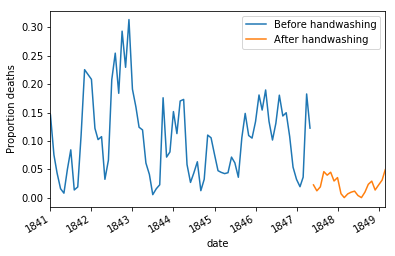

In [46]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime("1847-06-01")

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x="date", y="proportion_deaths",
                         label="Before handwashing")
ax = after_washing.plot(x="date", y="proportion_deaths",
                        label="After handwashing", ax=ax)
ax.set_ylabel("Proportion deaths")

In [47]:
%%nose

def test_before_washing_correct():
    correct_before_washing = monthly[monthly["date"] < handwashing_start]
    try:
        pd.testing.assert_frame_equal(before_washing, correct_before_washing)
    except AssertionError:
        assert False, "before_washing should contain the rows of monthly < handwashing_start" 

def test_after_washing_correct():
    correct_after_washing = monthly[monthly["date"] >= handwashing_start]
    try:
        pd.testing.assert_frame_equal(after_washing, correct_after_washing)
    except AssertionError:
        assert False, "after_washing should contain the rows of monthly >= handwashing_start" 

def test_ax_exists():
    assert 'ax' in globals(), \
        "The result of the plot method should be assigned to a variable called ax"

        
def test_plot_plots_correct_data():
    y0_len = ax.get_lines()[0].get_ydata().shape[0]
    y1_len = ax.get_lines()[1].get_ydata().shape[0]
    assert (
        (before_washing["proportion_deaths"].shape[0] == y0_len and
         after_washing["proportion_deaths"].shape[0] == y1_len)
        or
        (before_washing["proportion_deaths"].shape[0] == y0_len and
         after_washing["proportion_deaths"].shape[0] == y1_len)), \
        "The data in before_washing and after_washing should be plotted as two separate lines."

4/4 tests passed


## 7. More handwashing, fewer deaths?

Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?

* Select the column `proportion_deaths` in `before_washing` and put it into `before_proportion`.
* Do the same for `proportion_deaths` in `after_washing` and put it into `after_proportion`. 
* Calculate the difference in mean monthly proportion of deaths as mean `before_proportion` minus mean `after_proportion`.

<hr>

For info on how to calculate the mean of `before_proportion` and `after_proportion` take a look under the heading **Summarize data** in the [pandas cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf).

If `my_col` is the content of a DataFrame column you can calculate its mean like this:

```python
my_col.mean()
```

In [48]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = ...
after_proportion = ...
mean_diff = ...
mean_diff

Ellipsis

In [49]:
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.0839566075118334

In [50]:
%%nose
        
def test_before_proportion_exists():
    assert 'before_proportion' in globals(), \
        "before_proportion should be defined"
        
def test_after_proportion_exists():
    assert 'after_proportion' in globals(), \
        "after_proportion should be defined"
        
def test_mean_diff_exists():
    assert 'mean_diff' in globals(), \
        "mean_diff should be defined"

def test_correct_mean_diff():
    correct_before_proportion = before_washing["proportion_deaths"]
    correct_after_proportion = after_washing["proportion_deaths"]
    correct_mean_diff = after_proportion.mean() - before_proportion.mean()
    assert mean_diff == correct_mean_diff, \
        "mean_diff should be calculated as the mean of after_proportion minus the mean of before_proportion."

4/4 tests passed


## 8. A Bootstrap analysis of Semmelweis handwashing data

It reduced the proportion of deaths by around 8 percentage points! From 10% on average to just 2% (which is still a high number by modern standards). 

To get a feeling for the uncertainty around how much handwashing reduces mortalities we could look at a confidence interval (here calculated using the bootstrap method).

- Make a bootstrap analysis of the difference in mean monthly proportion of deaths.
    - `boot_before` and `boot_after` should be sampled with replacement from `before_proportion` and `after_proportion`
    - Append 3000 bootstrapped differences in means to `boot_mean_diff`.
    - Calculate a 95% `confidence_interval` as the 2.5% and 97.5% quantiles of `boot_mean_diff`.

<hr>

A bootstrap analysis is a quick way of getting at the uncertainty of an estimate, in your case the estimate is the `mean_diff` you calculated in task 7. A bootstrap analysis works by _simulating_ redoing the data collection by drawing randomly from the data and allowing a value to be drawn many times. Using a pandas column `my_col` (also called a _Series_) this can be done like this:

```python
boot_col = my_col.sample(frac=1, replace=True)
```

The estimate is then calculated using `boot_col` instead of `my_col`. This process is repeated a large number of times and the distribution of the bootstrapped estimates represents the uncertainty around the original estimate. If `boot_mean` is a list of boostrap estimates you can calculate a 95% confidence interval using pandas:

```python
pd.Series(boot_mean).quantile([0.025, 0.975])
```

This is what you should be appended to `boot_mean_dif`:

```python
boot_after.mean() - boot_before.mean()
```

In [51]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = ...
    boot_after = ...
    boot_mean_diff.append( ... )

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = ...
confidence_interval


Ellipsis

In [77]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.100981
0.975   -0.066875
dtype: float64

In [53]:
%%nose

def test_confidence_interval_exists():
    assert 'confidence_interval' in globals(), \
        "confidence_interval should be defined"

def test_confidence_interval_correct():
    assert  (-0.11 < confidence_interval.iloc[0] < -0.09) and (-0.075 < confidence_interval.iloc[1] < -0.055) , \
        "confidence_interval should be calculated as the [0.025, 0.975] quantiles of boot_mean_diff."

2/2 tests passed


## 9. The fate of Dr. Semmelweis

So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.

The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as *bacteria*) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.

One reason for this was that statistics and statistical arguments was uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.

Congrats, you've made it this far! If you haven't tried it already, you should **check** your project now by clicking the "Check project" button.

Good luck! :)

<hr>


When you've finished this project [you should probably wash your hands](https://www.cbtnuggets.com/blog/2016/10/bytes-and-bacteria-exposing-the-germs-on-your-technology/) too... 

In [54]:
# That concludes "Dr. Semmelweis and the discovery of handwashing"

In [55]:
# That concludes "Dr. Semmelweis and the discovery of handwashing"

In [56]:
%%nose
#

No tests found.